In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns


from sklearn.linear_model import LinearRegression as lm
import statsmodels.formula.api as sm
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans,DBSCAN

In [3]:
df_inventory=pd.read_csv('movie_inventory_spreadsheets.csv',engine='python')
df_inventory

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,country_3,director,actor_1,actor_2,actor_3,studio,description,contract_price,studio_score,price_class
0,I-1021,2014,tt0499549,Avatar,2009,12-18-2009,162,PG-13,PG-13,7.8,...,NaN,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,20th Century Fox,A paraplegic Marine dispatched to the moon Pan...,920,6,10
1,I-1001,2014,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,05-19-2005,140,PG-13,PG-13,7.5,...,NaN,George Lucas,Ewan McGregor,Natalie Portman,Hayden Christensen,20th Century Fox,"Three years into the Clone Wars, the Jedi resc...",920,6,10
2,I-1085,2017,tt3896198,Guardians of the Galaxy Vol. 2,2017,05-05-2017,136,PG-13,PG-13,7.6,...,NaN,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,BUENA VISTA,The Guardians struggle to keep together as a t...,730,10,1
3,I-1100,2018,tt3606756,Incredibles 2,2018,06-15-2018,118,PG,PG,7.7,...,NaN,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,BUENA VISTA,The Incredibles hero family takes on a new mis...,1000,10,10
4,I-1015,2014,tt1049413,Up,2009,05-29-2009,96,PG,PG,8.2,...,NaN,Pete Docter,Edward Asner,Christopher Plummer,Jordan Nagai,BUENA VISTA,Seventy-eight year old Carl Fredricksen travel...,1000,10,10
5,I-1023,2014,tt0435761,Toy Story 3,2010,06-18-2010,103,G,G,8.3,...,NaN,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,BUENA VISTA,The toys are mistakenly delivered to a day-car...,1000,10,10
6,I-1078,2016,tt1211837,Doctor Strange,2016,11-04-2016,115,PG-13,PG-13,7.5,...,NaN,Scott Derrickson,Benedict Cumberba,Chiwetel Ejiofor,Rachel McAdams,BUENA VISTA,While on a journey of physical and spiritual h...,730,10,1
7,I-1004,2014,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,07-07-2006,151,PG-13,PG-13,7.3,...,NaN,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,BUENA VISTA,Jack Sparrow races to recover the heart of Dav...,730,10,1
8,I-1048,2015,tt2395427,Avengers: Age of Ultron,2015,05-01-2015,141,PG-13,PG-13,7.3,...,NaN,Joss Whedon,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,BUENA VISTA,When Tony Stark and Bruce Banner try to jump-s...,730,10,1
9,I-1097,2018,tt4154756,Avengers: Infinity War,2018,04-27-2018,149,PG-13,PG-13,8.5,...,NaN,Anthony Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,BUENA VISTA,The Avengers and their allies must be willing ...,1000,10,10


In [4]:
drop_column=['movie_id','title','release_date','genre_1','genre_2','genre_3','country_1','country_2','country_3','director','actor_1','actor_2','actor_3','studio','description','item_id','mpa_rating','mpa_rating_origin']
df_final_meta = df_inventory.drop(drop_column, axis = 1, inplace= False)

In [5]:
df_final_meta

,contract_year,release_year,runtime,imdb_score,votes,reviews_users,reviews_critics,budget,income_usa,income_ww,theater_opening,theater_total,contract_price,studio_score,price_class
0,2014,2009,162,7.8,1066602,3304,727,237000000,760507625,2789968301,3452,3461,920,6,10
1,2014,2005,140,7.5,655343,3385,376,113000000,380270577,850035635,3661,3663,920,6,10
2,2017,2017,136,7.6,510984,971,572,200000000,389813101,863756051,4347,4347,730,10,1
3,2018,2018,118,7.7,219133,1033,385,200000000,608581744,1242805359,4410,4410,1000,10,10
4,2014,2009,96,8.2,869605,810,421,175000000,293004164,735099082,3766,3886,1000,10,10
5,2014,2010,103,8.3,707349,825,474,200000000,415004880,1066969703,4028,4028,1000,10,10
6,2016,2016,115,7.5,541463,880,571,165000000,232641920,677718395,3882,3882,730,10,1
7,2014,2006,151,7.3,623360,1867,320,225000000,423315812,1066179725,4133,4133,730,10,1
8,2015,2015,141,7.3,688963,1242,682,250000000,459005868,1402805868,4276,4276,730,10,1
9,2018,2018,149,8.5,725138,4111,591,321000000,678815482,2048359754,4474,4474,1000,10,10


In [6]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_final_meta)
df_scaled[:5]

C:\Users\JinSoo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\JinSoo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



array([[-0.91699518, -1.26707521,  1.73012326,  0.74605145,  1.8578618 ,
         1.96493738,  1.65294391,  1.24244383,  3.73922416,  5.36398235,
        -0.44590116, -1.81339801,  0.72998832, -1.2344268 ,  1.14100908],
       [-0.91699518, -2.36797663,  0.69480187,  0.37302572,  0.58272804,
         2.0445226 , -0.58869746, -0.49788053,  0.65237053,  0.19362838,
        -0.194412  , -1.14689479,  0.72998832, -1.2344268 ,  1.14100908],
       [ 1.22715531,  0.93472762,  0.50656162,  0.49736763,  0.13513411,
        -0.32731345,  0.6630453 ,  0.7231535 ,  0.72983898,  0.23019635,
         0.63105003,  1.10997751, -0.60412826,  0.81009259, -0.88226725],
       [ 1.94187215,  1.20995297, -0.34051951,  0.62170954, -0.76976782,
        -0.26639637, -0.53121948,  0.7231535 ,  2.50585419,  1.24044744,
         0.70685777,  1.31784732,  1.29172162,  0.81009259,  1.14100908],
       [-0.91699518, -1.26707521, -1.3758409 ,  1.24341908,  1.24706052,
        -0.48550135, -0.30130754,  0.37228165, 

In [7]:
df_item=pd.DataFrame(df_inventory.item_id)

In [8]:
df_final_meta=pd.merge(df_item,df_final_meta,left_index=True, right_index=True,how='left')
df_final_meta

,item_id,contract_year,release_year,runtime,imdb_score,votes,reviews_users,reviews_critics,budget,income_usa,income_ww,theater_opening,theater_total,contract_price,studio_score,price_class
0,I-1021,2014,2009,162,7.8,1066602,3304,727,237000000,760507625,2789968301,3452,3461,920,6,10
1,I-1001,2014,2005,140,7.5,655343,3385,376,113000000,380270577,850035635,3661,3663,920,6,10
2,I-1085,2017,2017,136,7.6,510984,971,572,200000000,389813101,863756051,4347,4347,730,10,1
3,I-1100,2018,2018,118,7.7,219133,1033,385,200000000,608581744,1242805359,4410,4410,1000,10,10
4,I-1015,2014,2009,96,8.2,869605,810,421,175000000,293004164,735099082,3766,3886,1000,10,10
5,I-1023,2014,2010,103,8.3,707349,825,474,200000000,415004880,1066969703,4028,4028,1000,10,10
6,I-1078,2016,2016,115,7.5,541463,880,571,165000000,232641920,677718395,3882,3882,730,10,1
7,I-1004,2014,2006,151,7.3,623360,1867,320,225000000,423315812,1066179725,4133,4133,730,10,1
8,I-1048,2015,2015,141,7.3,688963,1242,682,250000000,459005868,1402805868,4276,4276,730,10,1
9,I-1097,2018,2018,149,8.5,725138,4111,591,321000000,678815482,2048359754,4474,4474,1000,10,10


In [9]:
df_scaled_x=df_scaled[:,0:15]

Text(0, 0.5, 'sample index')

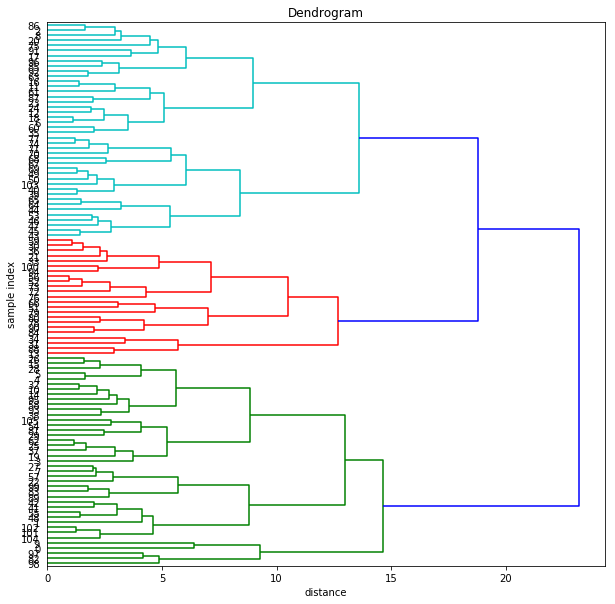

In [10]:
### 고객군집분석과 유일하게 다른 부분인 덴드로그램.
### 덴드로그램을 사용하면 각 단계에서 군집이 어떻게 형성되는지 확인하고 형성된 군집의 유사성(또는 거리) 수준을 평가할 수 있음.
### 가령 군집화 하려하는 거리의 기준을 15로 잡았을 때, 3개의 군집이 형성되는 것



z_ward=linkage(df_scaled_x,method='ward',metric='euclidean')
z_average=linkage(df_scaled_x,method='average',metric='euclidean')
z_mink=linkage(df_scaled_x,method='average',metric='minkowski')

plt.figure(figsize=(10,10))
ax=plt.subplot(111)

dendrogram(z_ward, leaf_font_size=10, orientation='right')
plt.title('Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

In [11]:
cluster_hie=fcluster(Z=z_ward, t=5, criterion='distance')
df_final_meta['ClusterHierarchical']=cluster_hie
df_final_meta.head()

,item_id,contract_year,release_year,runtime,imdb_score,votes,reviews_users,reviews_critics,budget,income_usa,income_ww,theater_opening,theater_total,contract_price,studio_score,price_class,ClusterHierarchical
0,I-1021,2014,2009,162,7.8,1066602,3304,727,237000000,760507625,2789968301,3452,3461,920,6,10,2
1,I-1001,2014,2005,140,7.5,655343,3385,376,113000000,380270577,850035635,3661,3663,920,6,10,4
2,I-1085,2017,2017,136,7.6,510984,971,572,200000000,389813101,863756051,4347,4347,730,10,1,25
3,I-1100,2018,2018,118,7.7,219133,1033,385,200000000,608581744,1242805359,4410,4410,1000,10,10,7
4,I-1015,2014,2009,96,8.2,869605,810,421,175000000,293004164,735099082,3766,3886,1000,10,10,10


In [12]:
n_cluster=25     ##내맘대로 군집 생성 개수
cluster_range = [i+1 for i in range(n_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_scaled_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error=pd.DataFrame({'number of cluster':cluster_range, 'error':clus_error})
ds_error

,number of cluster,error
0,1,1590.000000
1,2,1275.255045
2,3,1114.295606
3,4,995.336667
4,5,909.496249
5,6,843.441428
6,7,762.412964
7,8,711.270819
8,9,679.534017
9,10,630.372325


Text(0, 0.5, 'sum of sqaured distance')

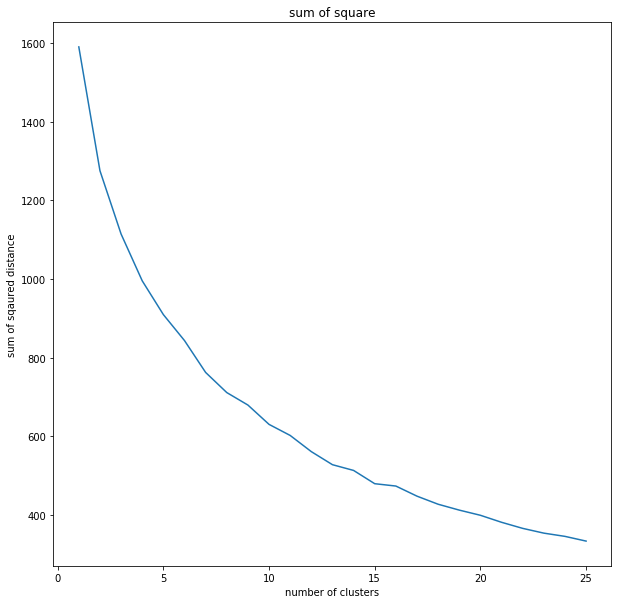

In [13]:
plt.figure(figsize=(10,10))
plt.plot(ds_error['number of cluster'],ds_error['error'])
plt.title('sum of square')
plt.xlabel('number of clusters')
plt.ylabel('sum of sqaured distance')

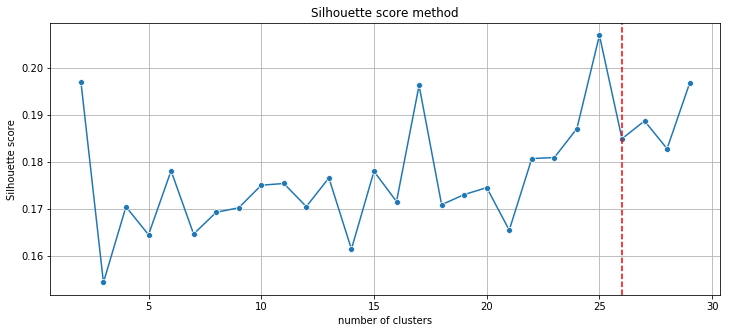

In [14]:
from sklearn.metrics import silhouette_score
n_clusters = range(2,30)
clusters_inertia = [] 
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(df_scaled_x)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df_scaled_x, KM_est.labels_)
    s_scores.append(silhouette_avg)
    
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(26, ls="--", c="red")
plt.grid()
plt.show()

In [15]:
clus=KMeans(6)
clus.fit(df_scaled_x)
cluster_kmeans=[i+1 for i in clus.labels_]
df_final_meta['clustr Kmeans']=cluster_kmeans
df_final_meta

,item_id,contract_year,release_year,runtime,imdb_score,votes,reviews_users,reviews_critics,budget,income_usa,income_ww,theater_opening,theater_total,contract_price,studio_score,price_class,ClusterHierarchical,clustr Kmeans
0,I-1021,2014,2009,162,7.8,1066602,3304,727,237000000,760507625,2789968301,3452,3461,920,6,10,2,1
1,I-1001,2014,2005,140,7.5,655343,3385,376,113000000,380270577,850035635,3661,3663,920,6,10,4,4
2,I-1085,2017,2017,136,7.6,510984,971,572,200000000,389813101,863756051,4347,4347,730,10,1,25,2
3,I-1100,2018,2018,118,7.7,219133,1033,385,200000000,608581744,1242805359,4410,4410,1000,10,10,7,4
4,I-1015,2014,2009,96,8.2,869605,810,421,175000000,293004164,735099082,3766,3886,1000,10,10,10,4
5,I-1023,2014,2010,103,8.3,707349,825,474,200000000,415004880,1066969703,4028,4028,1000,10,10,10,4
6,I-1078,2016,2016,115,7.5,541463,880,571,165000000,232641920,677718395,3882,3882,730,10,1,22,2
7,I-1004,2014,2006,151,7.3,623360,1867,320,225000000,423315812,1066179725,4133,4133,730,10,1,6,6
8,I-1048,2015,2015,141,7.3,688963,1242,682,250000000,459005868,1402805868,4276,4276,730,10,1,25,2
9,I-1097,2018,2018,149,8.5,725138,4111,591,321000000,678815482,2048359754,4474,4474,1000,10,10,3,1


<Figure size 7200x7200 with 0 Axes>

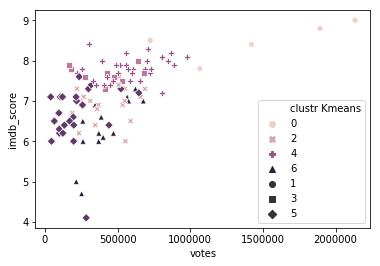

<Figure size 7200x7200 with 0 Axes>

In [16]:
%matplotlib inline

sns.scatterplot(x='votes',y='imdb_score',hue='clustr Kmeans',style='clustr Kmeans',data=df_final_meta)
plt.figure(figsize=(100,100))

In [17]:
db = DBSCAN(eps=0.3, min_samples=10)

db.fit(df_scaled_x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 0


In [18]:
db.fit(df_scaled_x)
labels_db=db.labels_

for (i,val) in enumerate(labels_db):
    if val<0:
        labels_db[i]=0
    else:
        labels_db[i]=labels_db[i]+1

df_final_meta['cluster DBSCAN']=labels_db
df_final_meta.head()

,item_id,contract_year,release_year,runtime,imdb_score,votes,reviews_users,reviews_critics,budget,income_usa,income_ww,theater_opening,theater_total,contract_price,studio_score,price_class,ClusterHierarchical,clustr Kmeans,cluster DBSCAN
0,I-1021,2014,2009,162,7.8,1066602,3304,727,237000000,760507625,2789968301,3452,3461,920,6,10,2,1,0
1,I-1001,2014,2005,140,7.5,655343,3385,376,113000000,380270577,850035635,3661,3663,920,6,10,4,4,0
2,I-1085,2017,2017,136,7.6,510984,971,572,200000000,389813101,863756051,4347,4347,730,10,1,25,2,0
3,I-1100,2018,2018,118,7.7,219133,1033,385,200000000,608581744,1242805359,4410,4410,1000,10,10,7,4,0
4,I-1015,2014,2009,96,8.2,869605,810,421,175000000,293004164,735099082,3766,3886,1000,10,10,10,4,0


In [25]:
#### plotly 패키지 꼭 다운받자!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# k_means clustering

clus_labels = clus.labels_
centroids = clus.cluster_centers_

df_final_meta['labels']=clus_labels
trace1=go.Scatter3d(
    x=df_final_meta['imdb_score'],
    y=df_final_meta['budget'],
    z=df_final_meta['income_ww'],
    mode='markers',
    marker=dict(
        color=clus_labels,
        size=2,
        line=dict(
            color=clus_labels,
            width=12
        ),
        opacity=0.8
    )
)

graph_3d=[trace1]

layout = go.Layout(
    title = 'movie clustering',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'imdb_score'),
            yaxis = dict(title  = 'budget'),
            zaxis = dict(title  = 'income_ww')
        )
)

fig = go.Figure(data = graph_3d, layout = layout)
py.iplot(fig)

In [30]:
# dbscan clustering
### 위에서 dbscan 군집분석을 할 시에 적절한 군집이 0개가 나왔으므로 이러한 그래프가 그려지는게 아닐까함.

df_final_meta['labels']=labels_db
trace2=go.Scatter3d(
    x=df_final_meta['imdb_score'],
    y=df_final_meta['budget'],
    z=df_final_meta['income_ww'],
    mode='markers',
    marker=dict(
        color=labels_db,
        size=2,
        line=dict(
            color=labels_db,
            width=12
        ),
        opacity=0.8
    )
)

graph_3d=[trace2]

layout2 = go.Layout(
    title = 'movie clustering',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'imdb_score'),
            yaxis = dict(title  = 'budget'),
            zaxis = dict(title  = 'income_ww')
        )
)

fig = go.Figure(data = graph_3d, layout = layout2)
py.iplot(fig)